# 

# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Regression

### Data

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


Features:

* `age`: age in years
* `sex`
* `bmi`: body mass index
* `bp`: average blood pressure
* `s1`: tc, total serum cholesterol
* `s2`: ldl, low-density lipoproteins
* `s3`: hdl, high-density lipoproteins
* `s4`: tch, total cholesterol / HDL
* `s5`: ltg, possibly log of serum triglycerides level
* `s6`: glu, blood sugar level

Target:

* Quantitative measure of disease progression one year after baseline

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, utils

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 0.24.1

1.1.3


#### Data loading

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [5]:
# utils.Bunch?

In [6]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [7]:
type(diabetes.data)

numpy.ndarray

In [8]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### Selection of training data

Load data in a pandas `DataFrame` and select `s3` as single feature for prediction, and `target` as target into NumPy arrays named `xs` and `ys`, respectively.

Note: Expected shapes for features and labels (target values):

<span style="color:red">Implement your solution below</span>

In [10]:
import pandas as pd
FT = "bmi"
data = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
xs = data['s3']
ys = diabetes.target

#### Plot the feature against the target

Using Matplotlib, Seaborn, or the Matplotlib pandas' API:

<span style="color:red">Implement your solution below</span>

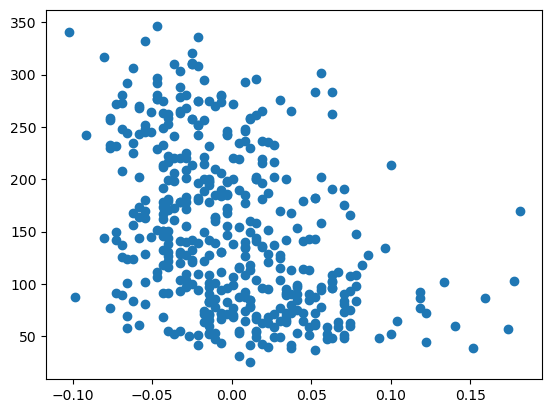

In [11]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)

##### Random selection of training and test sets

In [12]:
from  sklearn.model_selection import train_test_split

train_xs, test_xs, train_ys, test_ys = train_test_split(xs,ys, test_size = 0.2, random_state = 42, shuffle=True)
train_xs = np.array(train_xs).reshape(-1,1)
train_ys = np.array(train_ys).reshape(-1,1)
test_xs = np.array(test_xs).reshape(-1,1)
test_ys = np.array(test_ys).reshape(-1,1)

<span style="color:red">Implement your solution below</span>

### Training

<span style="color:red">Implement your solution below</span>

In [13]:
# 1. Model choice (import)
from sklearn.linear_model import LinearRegression

# 2. Instantiation
model = LinearRegression()

print(train_xs.shape)
# 3. Learn (fit) the model
model.fit(train_xs,train_ys)

# 4. Predict on new data
results =model.predict(test_xs)

(353, 1)


### Results

In [14]:
print(results.shape)

(89, 1)


#### Plots

<span style="color:red">Implement your solution below</span>

Model slope:     [-637.18957587]
Model intercept: [153.10636092]


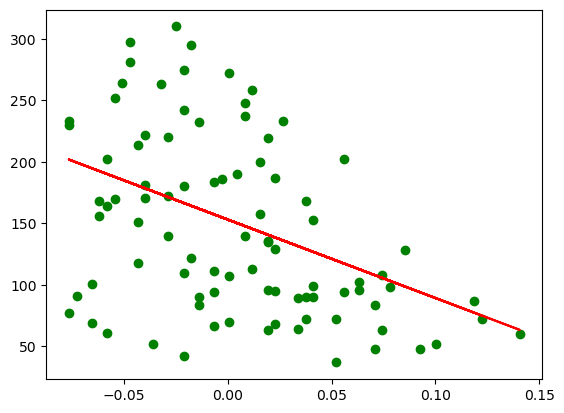

In [15]:

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
plt.plot(test_xs, results, color='red', label='regression line')     # regression line
plt.scatter(test_xs, test_ys, c='green', label='actual values')   # scatter plot showing actual data

#### Evaluations

* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

<span style="color:red">Implement your solution below</span>

In [16]:
from sklearn.metrics import mean_squared_error
# Calculating RMSE and R2 Score
mse = mean_squared_error(test_ys, results)
rmse = np.sqrt(mse)
r2_score = model.score(test_xs, test_ys)
print("mse: {}\nrmse: {}\nr2: {}".format(mse,rmse,r2_score))

mse: 4317.345872786977
rmse: 65.70651316868806
r2: 0.18512226947901855


### Non-linear approaches

* Adapt linear regression by transforming data according to basis functions
* E.g., with a polynomial projection:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Note that this is still a linear model
* It is linear in the sense that we never multiply or divide the coefficients
* The one-dimensional descriptor $x$ is projected in one or more dimensions to allow modeling more complex relations between $x$ and $y$

<span style="color:red">Implement your solution below</span>

In [17]:
def apply_basis(arr):
    return np.hstack([arr, arr ** 2])

### Training

<span style="color:red">Implement your solution below</span>

(89,) (89, 1)


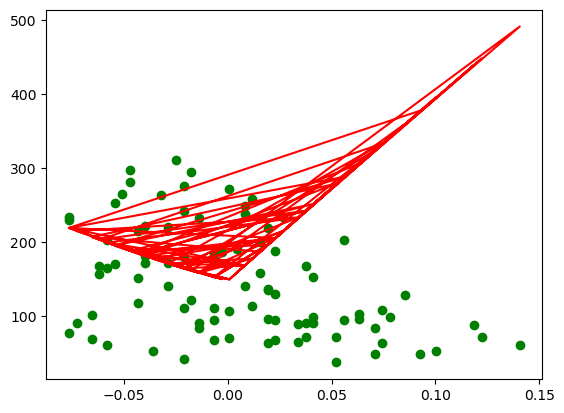

In [19]:
# 1. Model choice (import)
from sklearn.linear_model import LinearRegression

# 2. Instantiation
model = LinearRegression()

# 3. Learn (fit) the model
#print(train_xs,apply_basis(train_xs))
model.fit(apply_basis(train_xs), train_ys)

# 4. Predict on new data
results = model.predict(np.sort(apply_basis(test_xs)))  # Corrected line
print(test_xs[:, 0].shape, results.shape)

plt.plot(np.sort(test_xs), np.sort(results), color='red', label='regression line')  # regression line
#plt.scatter(test_xs, results, color='red', label='regression line')     # regression line
plt.scatter(test_xs, test_ys, c='green', label='actual values')   # scatter plot showing actual data


#### Plots

Construction of an `array` with increasing values that extend from the lower and upper bounds of the data to produce the result of the regression on the graph.

<span style="color:red">Implement your solution below</span>

mse: 20514.289100724975
rmse: 143.22810164463178
r2: 0.14699740157731378


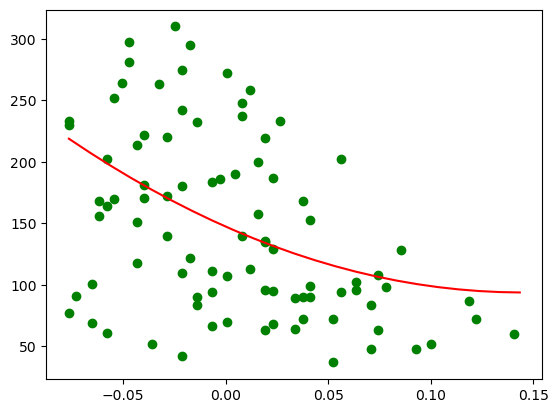

In [20]:
HOP = 0.01

# The limit values of the features' 1st column
min_val = min(test_xs)
max_val = max(test_xs)

# The array that spans the amplitude of data values (with steps of size HOP)
arr = np.arange(min_val,max_val+HOP,HOP)
#print(arr)

# Concatenation of the selected feature and its squared version
conc = apply_basis(arr.reshape(-1,1))
#print(conc)

# Prediction using the model to produce the regression
resReg = model.predict(conc)

plt.plot(arr, resReg, color='red', label='regression line')     # regression line
plt.scatter(test_xs, test_ys, c='green', label='actual values')   # scatter plot showing actual data

# Calculating RMSE and R2 Score
mse = mean_squared_error(test_ys, results)
rmse = np.sqrt(mse)
r2_score = model.score(apply_basis(test_xs), test_ys)
print("mse: {}\nrmse: {}\nr2: {}".format(mse,rmse,r2_score))

#### Evaluations

<span style="color:red">Implement your solution below</span>

Print coefficients $a_1$ and $a_2$ from the regression, as in:

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)}$$

In [21]:
model_coef_list = model.coef_
print(model.coef_)
print("a_1 = {}, a_2 = {}".format(model.coef_[:,0], model.coef_[:,1]))

[[-738.26082534 2546.62528878]]
a_1 = [-738.26082534], a_2 = [2546.62528878]


## Further assignment

#### Goal: Try to improve the result of the linear regression

*   Perform the linear regression again using the set of features proposed, instead of just one. 
    The selection is made from the stage:
    [Selection of training data](#Selection-of-training-data)

*   Generate other features by taking, for example, the square of their values, 
    to take into account the non-linearity of the relations

*   Evaluate the performance of the regression in terms of MSE and R$^2$

*   Identify the features that seem the most significant for this regression, 
    by observing the value of their respective parameter ($a_j$ via `model.coef_`)

*   Comment succinctly

*   Note that visualization poses a problem when using more than one descriptor 
    (more than 2 in particular), so it is not required for this part

<span style="color:red">Implement your solution below</span>

In [22]:
xs = np.array(data)

train_xs, test_xs, train_ys, test_ys = train_test_split(xs,ys, test_size = 0.2, random_state = 42, shuffle=True)
#train_xs = np.array(train_xs).reshape(-1,1)
#train_ys = np.array(train_ys).reshape(-1,1)
#test_xs = np.array(test_xs).reshape(-1,1)
#test_ys = np.array(test_ys).reshape(-1,1)

# 1. Model choice (import)
from sklearn.linear_model import LinearRegression

# 2. Instantiation
model = LinearRegression()

# 3. Learn (fit) the model
print(train_xs.shape,apply_basis(train_xs).shape, train_ys.shape)
model.fit(apply_basis(train_xs),train_ys)

# 4. Predict on new data
results =model.predict(apply_basis(test_xs))

# Calculating RMSE and R2 Score
mse = mean_squared_error(test_ys, results)
rmse = np.sqrt(mse)
r2_score = model.score(apply_basis(test_xs), test_ys)
print("mse: {}\nrmse: {}\nr2: {}".format(mse,rmse,r2_score))

model_coef_list = model.coef_
print(model.coef_)

(353, 10) (353, 20) (353,)
mse: 2737.664457654948
rmse: 52.32269543568018
r2: 0.48327934200422806
[ 1.05322548e+02 -2.62371724e+02  4.54811121e+02  3.61143718e+02
 -4.41235196e+03  3.71117143e+03  1.29451664e+03  2.98180893e+01
  2.02740564e+03  3.45241694e+01  2.47441173e+03 -1.58432699e+00
  1.74248946e+03  2.36545847e+02  1.47282975e+03 -1.97113641e+03
  6.99568996e+02  1.28435529e+03  7.75221546e+03  1.72421378e+03]


---